In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin


import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# data cleaning
df = pd.read_csv('./food_coded.csv', na_values="nan")

drop_cols = ['comfort_food', 'comfort_food_reasons',
'diet_current', 'eating_changes', 'father_profession',
'fav_cuisine', 'food_childhood','healthy_meal', 'ideal_diet',
'meals_dinner_friend','mother_profession','type_sports','weight']

df.drop(drop_cols, inplace=True, axis=1)
print(df.head())
print(df.get_dtype_counts())

print(df.isnull().sum().sum())

## fill na values
for column in df:
    median = df[column].median()
    df[column].fillna(median, inplace=True)
## end data cleaning
print(df.isnull().sum().sum())

     GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0  2.400       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2  3.300       1          1               720           4.0           420.0   
3  3.200       1          1               430           3.0           420.0   
4  3.500       1          1               720           2.0           420.0   

   coffee  comfort_food_reasons_coded  cook  comfort_food_reasons_coded.1  \
0       1                         9.0   2.0                             9   
1       2                         1.0   3.0                             1   
2       2                         1.0   1.0                             1   
3       2                         2.0   2.0                             2   
4       2                         1.0   1.0                             1   

   ...  persian_food  self_perception_weight  soup  sports  th

In [67]:

X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = KMeans(n_clusters=4, max_iter=1000)
km.fit(X_std)
centroids = km.cluster_centers_
# kmeans = KMeans(n_clusters=4, random_state=0).fit(df)
print km.labels_

[1 1 1 1 0 3 1 0 2 2 0 1 3 1 0 0 2 3 0 3 3 2 1 0 1 0 0 1 0 2 0 1 2 0 0 0 0
 1 1 3 2 1 2 1 1 1 2 3 2 3 0 1 1 3 1 0 1 3 1 1 0 0 0 1 1 0 1 0 2 0 1 1 0 0
 3 2 0 0 1 1 3 2 2 1 1 2 1 0 1 1 1 0 0 1 1 1 3 0 1 0 1 1 0 2 1 0 2 0 2 0 2
 3 1 0 2 0 2 3 2 1 1 2 2 0 3]


ValueError: x and y must be the same size

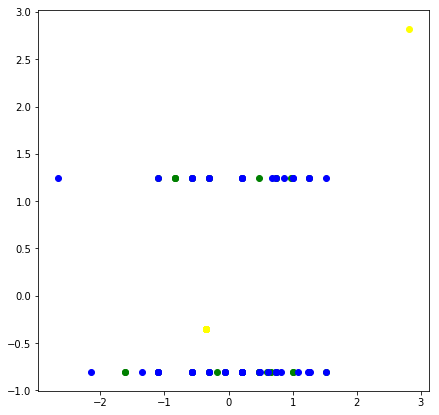

In [75]:

fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 1, 2], X_std[km.labels_ == 1, 2],
            c='yellow', label='cluster 3')
plt.scatter(X_std[km.labels_ == 0, 3], X_std[km.labels_ == 1, 3],
            c='black', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');
# centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
